# Dependencies

Mount drive to access datasets.

Import packages.

# New Section

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd 'gdrive/MyDrive/02740 Bioimage project'

/content/gdrive/MyDrive/02740 Bioimage project


In [ ]:
!ls

 Bioimage_Project.pdf		   mini_unet_epochs30.png
'Bioimage Project Proposal.gdoc'   Proposal.gslides
 data_preparation.ipynb		   quickview_data.ipynb
 datasets			   sample-processed-images.jpg
 fileIO.py			   sample-raw-images.jpg
'Final Presentation.gslides'	   trash.ipynb
 Guidelines.gdoc		   unet_predictions.png
 main.ipynb			   unet_predictions-train10.png
 main.py			  'unet_predictions-train30(2).png'
'Midway Presentation.gslides'	   unet_predictions-train30.png
 mini_unet_epochs10.png


In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import tensorflow as tf
import keras

from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank



# Import datasets

In [ ]:
SEED = 96
np.random.seed(SEED)

INPUT_SIZE = 512
# save_subdir = 'size512_localhist/'
save_subdir = 'size512/'

## Read individually downloaded datasets

Images are read in with skimage.io.imread (which reads in channel last) and are resized to INPUT_SIZE.

Make lists of images and concatenate.

In [ ]:
# Get STARE data (Hoover et al. 2000)
# ##########################################
# Get Images
stare_data_path = 'datasets/STARE/stare-images/'
stare_data_fnames = os.listdir(stare_data_path)
print('stare-images filenames:', stare_data_fnames)
stare_imgs = []
sample_nums = []

for i, f in enumerate(stare_data_fnames):
    img = imread(os.path.join(stare_data_path, f), plugin='matplotlib')
    img = img[...,1:2]
    img = tf.image.resize(img, (INPUT_SIZE, INPUT_SIZE))

    # # Global histogram equalization
    # img_eq = exposure.equalize_hist(img)

    # # adaptive histogram equalizaiont (implementation not working)
    # img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    # img_adapteq = exposure.equalize_adapthist(img)

    # # # Local histogram equalization
    # selem = disk(img.shape[0]//20)
    # selem = selem.reshape((selem.shape[0], selem.shape[1], 1))
    # img_localeq = rank.equalize(img, selem)

    stare_imgs.append(img)

    sample_num = re.search(r'\d\d\d\d', f).group()
    sample_nums.append(sample_num)


# Get VK Labels
stare_labelVK_path = 'datasets/STARE/labels-vk/'
stare_labelVK_fnames = os.listdir(stare_labelVK_path)
print('stare labels-vk filenames:', stare_labelVK_fnames)
stare_gtsVK = []

for id in sample_nums:
    for f in stare_labelVK_fnames:
        if re.search(id, f):
            img = imread(os.path.join(stare_labelVK_path, f))
            img = np.resize(img, (img.shape[0], img.shape[1], 1))
            img = tf.image.resize(img, (INPUT_SIZE, INPUT_SIZE))
            stare_gtsVK.append(img)


# Get AH Labels
stare_labelAH_path = 'datasets/STARE/labels-vk/'
stare_labelAH_fnames = os.listdir(stare_labelAH_path)
stare_gtsAH = []

for id in sample_nums:
    for i, f in enumerate(stare_labelAH_fnames):
        if re.search(id, f):
            img = imread(os.path.join(stare_labelAH_path, f))
            img = np.resize(img, (img.shape[0], img.shape[1], 1))
            img = tf.image.resize(img, (INPUT_SIZE, INPUT_SIZE))
            stare_gtsAH.append(img)


# Get DRIVE data (Staal et al. 2004)
# ##########################################
# Get Images
drive_train_data_path = 'datasets/DRIVE/training/images/'
drive_train_fnames = os.listdir(drive_train_data_path)
print('drive training fnames', drive_train_fnames)
drive_imgs = []
sample_nums = []

for i, f in enumerate(drive_train_fnames):
    img = imread(os.path.join(drive_train_data_path, f), plugin='matplotlib')
    img = img[...,1:2]
    img = tf.image.resize(img, (INPUT_SIZE, INPUT_SIZE))
    
    # # Global histogram equalization
    # img_eq = exposure.equalize_hist(img)

    # # adaptive histogram equalizaiont (implementation not working)
    # img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    # img_adapteq = exposure.equalize_adapthist(img)

    # # # Local histogram equalization
    # selem = disk(img.shape[0]//20)
    # selem = selem.reshape((selem.shape[0], selem.shape[1], 1))
    # img_localeq = rank.equalize(img, selem)

    drive_imgs.append(img)

    sample_num = re.search(r'\d\d', f).group()
    sample_nums.append(sample_num)

# Get Labels
drive_train_label_path = 'datasets/DRIVE/training/1st_manual/'
drive_train_label_fnames = os.listdir(drive_train_label_path)
print('drive training labels', drive_train_label_fnames)
drive_gts = []

for i, id in enumerate(sample_nums):
    for f in drive_train_label_fnames:
        if re.search(id, f):
          img = imread(os.path.join(drive_train_label_path, f))
          img = np.resize(img, (img.shape[0], img.shape[1], 1))
          img = tf.image.resize(img, (INPUT_SIZE, INPUT_SIZE))
          drive_gts.append(img)

# Get CHASE data (Owen et al. 2011)
##########################################
# Images and Labels
chase_data_path = 'datasets/CHASEDB1/'
chase_files = os.listdir(chase_data_path)

chase_imgs = []
chase_fnames = []

for i, f in enumerate(chase_files):
    if re.search('.jpg',f):
        img = imread(os.path.join(chase_data_path, f))
        img = img[...,1:2]
        img = tf.image.resize(img, (INPUT_SIZE, INPUT_SIZE))
    
        # # Global histogram equalization
        # img_eq = exposure.equalize_hist(img)

        # # adaptive histogram equalizaiont (implementation not working)
        # img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
        # img_adapteq = exposure.equalize_adapthist(img)

        # # # Local histogram equalization
        # selem = disk(img.shape[0]//20)
        # selem = selem.reshape((selem.shape[0], selem.shape[1], 1))
        # img_localeq = rank.equalize(img, selem)
        
        chase_imgs.append(img)
        chase_fnames.append(f)

chase_gts1 = []
chase_gts2 = []

for f in chase_fnames:
    sample_num = f.split('_')[-1].split('.')[0]
    for f2 in chase_files:
        if re.search(sample_num, f2) and re.search('1st',f2):
            gt1 = imread(os.path.join(chase_data_path, f2))
            gt1 = np.resize(gt1, (gt1.shape[0], gt1.shape[1], 1))
            gt1 = tf.image.resize(gt1, (INPUT_SIZE, INPUT_SIZE))
            chase_gts1.append(gt1)
        elif re.search(sample_num, f2) and re.search('2nd', f2):
            gt2 = imread(os.path.join(chase_data_path, f2))
            gt2 = np.resize(gt2, (gt2.shape[0], gt2.shape[1], 1))
            gt2 = tf.image.resize(gt2, (INPUT_SIZE, INPUT_SIZE))
            chase_gts2.append(gt2)


stare-images filenames: ['im0001.ppm', 'im0002.ppm', 'im0003.ppm', 'im0004.ppm', 'im0005.ppm', 'im0044.ppm', 'im0077.ppm', 'im0081.ppm', 'im0082.ppm', 'im0139.ppm', 'im0162.ppm', 'im0163.ppm', 'im0235.ppm', 'im0236.ppm', 'im0239.ppm', 'im0240.ppm', 'im0255.ppm', 'im0291.ppm', 'im0319.ppm', 'im0324.ppm']
stare labels-vk filenames: ['im0001.vk.ppm', 'im0002.vk.ppm', 'im0003.vk.ppm', 'im0004.vk.ppm', 'im0005.vk.ppm', 'im0044.vk.ppm', 'im0081.vk.ppm', 'im0082.vk.ppm', 'im0077.vk.ppm', 'im0139.vk.ppm', 'im0162.vk.ppm', 'im0236.vk.ppm', 'im0235.vk.ppm', 'im0163.vk.ppm', 'im0240.vk.ppm', 'im0239.vk.ppm', 'im0291.vk.ppm', 'im0255.vk.ppm', 'im0319.vk.ppm', 'im0324.vk.ppm']
drive training fnames ['24_training.tif', '26_training.tif', '37_training.tif', '33_training.tif', '32_training.tif', '35_training.tif', '27_training.tif', '39_training.tif', '29_training.tif', '28_training.tif', '23_training.tif', '30_training.tif', '34_training.tif', '36_training.tif', '38_training.tif', '21_training.tif', 

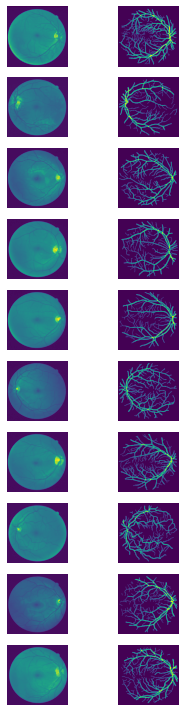

In [ ]:
fig, axs = plt.subplots(len(drive_imgs[:10]),2, figsize=(4,10))

for i, (x, y) in enumerate(zip(drive_imgs[:10], drive_gts[:10])):
    axs[i,0].imshow(x[...,0])
    axs[i,1].imshow(y[...,0])
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()

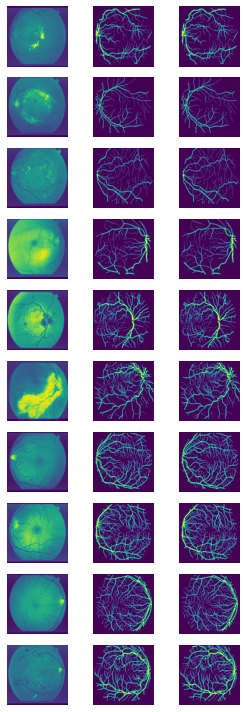

In [ ]:
fig, axs = plt.subplots(len(stare_imgs[:10]),3, figsize=(4,10))

for i, (x, y1, y2) in enumerate(zip(stare_imgs[:10], stare_gtsVK[:10], stare_gtsAH[:10])):
    axs[i,0].imshow(x[...,0])
    axs[i,1].imshow(y1[...,0])
    axs[i,2].imshow(y2[...,0])
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()

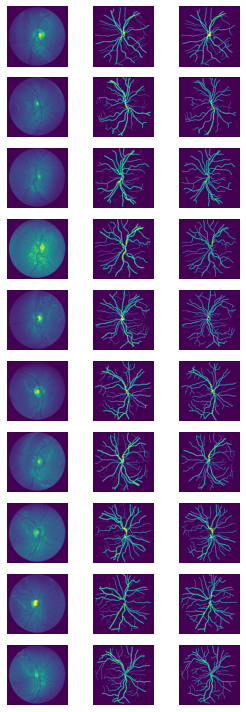

In [ ]:
fig, axs = plt.subplots(len(chase_imgs[:10]),3, figsize=(4,10))

for i, (x, y1, y2) in enumerate(zip(chase_imgs[:10], chase_gts1[:10], chase_gts2[:10])):
    axs[i,0].imshow(x[...,0])
    axs[i,1].imshow(y1[...,0])
    axs[i,2].imshow(y2[...,0])
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()

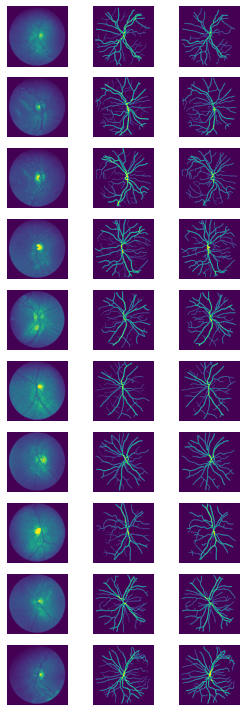

In [ ]:
fig, axs = plt.subplots(len(chase_imgs[10:20]),3, figsize=(4,10))

for i, (x, y1, y2) in enumerate(zip(chase_imgs[10:20], chase_gts1[10:20], chase_gts2[10:20])):
    axs[i,0].imshow(x[...,0])
    axs[i,1].imshow(y1[...,0])
    axs[i,2].imshow(y2[...,0])
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()

## Randomize chosen labels

In [ ]:
stare_gts = stare_gtsAH
chase_gts = chase_gts1

# stare_gts = stare_gtsAH
# mask = np.random.choice([True, False], size=len(stare_imgs))
# print(mask)
# np.array(stare_gts)[mask] = np.array(stare_gtsVK)[mask]
# print(len(stare_gts))

# chase_gts = chase_gts1
# mask = np.random.choice([True, False], size=len(chase_imgs))
# print(mask)
# np.array(chase_gts)[mask] = np.array(chase_gts2)[mask]
# print(len(chase_gts))

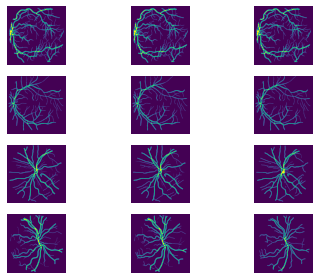

In [ ]:
fig, axs = plt.subplots(4,3)
axs[0,0].imshow(stare_gts[0][...,0]) # Chosen
axs[0,1].imshow(stare_gtsAH[0][...,0]) # True
axs[0,2].imshow(stare_gtsVK[0][...,0])
axs[1,0].imshow(stare_gts[1][...,0]) # Chosen
axs[1,1].imshow(stare_gtsAH[1][...,0]) # False
axs[1,2].imshow(stare_gtsVK[1][...,0])
axs[2,0].imshow(chase_gts[0][...,0]) # Chosen
axs[2,1].imshow(chase_gts1[0][...,0]) # False
axs[2,2].imshow(chase_gts2[0][...,0])
axs[3,0].imshow(chase_gts[1][...,0]) # Chosen
axs[3,1].imshow(chase_gts1[1][...,0]) # True
axs[3,2].imshow(chase_gts2[1][...,0])
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()

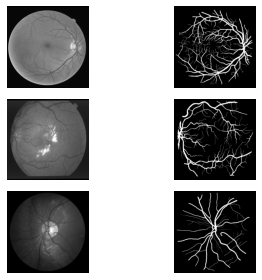

In [ ]:
fig, axs = plt.subplots(3,2)
axs[0,0].imshow(drive_imgs[0][...,0], cmap='gray')
axs[0,1].imshow(drive_gts[0][...,0], cmap='gray')
axs[1,0].imshow(stare_imgs[0][...,0], cmap='gray')
axs[1,1].imshow(stare_gts[0][...,0], cmap='gray')
axs[2,0].imshow(chase_imgs[0][...,0], cmap='gray')
axs[2,1].imshow(chase_gts[0][...,0], cmap='gray')
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.savefig("sample-processed-images.jpg")

In [ ]:
imgs = np.concatenate((stare_imgs, drive_imgs, chase_imgs))
gts = np.concatenate((stare_gts, drive_gts, chase_gts1))
print(len(imgs))
print(len(gts))
print(imgs[0].shape)
print(gts[0].shape)

print(imgs[0].dtype)
print(gts[0].dtype)

68
68
(512, 512, 1)
(512, 512, 1)
float32
float32


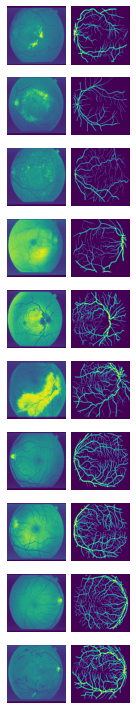

In [ ]:
fig, axs = plt.subplots(10,2, figsize=(2,10))
for i, (x, y) in enumerate(zip(imgs[:10], gts[:10])):
    axs[i,0].imshow(x[...,0])
    axs[i,1].imshow(y[...,0])
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()

# Split datasets

Make a list of random indexes and assign images to training, validation, and testing datasets.

In [ ]:
rand_indxs = np.random.choice(len(imgs), size=len(imgs), replace=False)
print(rand_indxs)

[29 13 42 55 27 16 44 19 63  0 60 31 56 64 22 35 32 49 11  7 40 28 30 48
  4 65  5 67 25 36 18 58 62 34 53 43 23 46 10 14 51  1 41  8 12 21 20 24
 15 57 52 39 33 45  3 50 17 26 37  2  9 47  6 59 61 54 66 38]


In [ ]:
##########################################
# Get training dataset
train_size = 0.6
train_imgs = np.zeros((int(len(rand_indxs)*train_size), imgs[0].shape[0], imgs[0].shape[1], imgs[0].shape[2]))
train_gts = np.zeros((int(len(rand_indxs)*train_size), imgs[0].shape[0], imgs[0].shape[1], imgs[0].shape[2]))

for i, ri in enumerate(rand_indxs[0:int(len(rand_indxs)*train_size)]):
    train_imgs[i] = imgs[ri]
    train_gts[i] = gts[ri]
train_imgs = train_imgs / np.max(train_imgs)
train_gts = train_gts / np.max(train_gts)
print(train_imgs.shape)
print(train_gts.shape)

##########################################
# Get validation dataset
valid_size = 0.2
valid_imgs = np.zeros((int(len(rand_indxs)*valid_size)+1, imgs[0].shape[0], imgs[0].shape[1], imgs[0].shape[2]))
valid_gts = np.zeros((int(len(rand_indxs)*valid_size)+1, imgs[0].shape[0], imgs[0].shape[1], imgs[0].shape[2]))

for i, ri in enumerate(rand_indxs[int(len(imgs)*train_size):int(len(imgs)*(train_size+valid_size))]):
    valid_imgs[i] = imgs[ri]
    valid_gts[i] = gts[ri]
valid_imgs = valid_imgs / np.max(valid_imgs)
valid_gts = valid_gts / np.max(valid_gts)
print(valid_imgs.shape)
print(valid_gts.shape)

##########################################
# Get testing dataset
test_indxs = rand_indxs[int(len(imgs)*(train_size+valid_size)):]
test_imgs = np.zeros((int(len(rand_indxs)*valid_size)+1, imgs[0].shape[0], imgs[0].shape[1], imgs[0].shape[2]))
test_gts = np.zeros((int(len(rand_indxs)*valid_size)+1, imgs[0].shape[0], imgs[0].shape[1], imgs[0].shape[2]))

for i, ri in enumerate(test_indxs):
    test_imgs[i] = imgs[ri]
    test_gts[i] = gts[ri]
test_imgs = test_imgs / np.max(test_imgs)
test_gts = test_gts / np.max(test_gts)
print(test_imgs.shape)
print(test_gts.shape)

(40, 512, 512, 1)
(40, 512, 512, 1)
(14, 512, 512, 1)
(14, 512, 512, 1)
(14, 512, 512, 1)
(14, 512, 512, 1)


# Export datasets

In [ ]:
SAVE_DIR = os.path.join('datasets/', save_subdir)

# Save Training dataset
train_dir = os.path.join(SAVE_DIR, 'training/')
if not os.path.isdir(train_dir):
        os.makedirs(train_dir)
for i, img in enumerate(train_imgs):
  imsave(train_dir+str(i)+'_image.tif', img)

for i, img in enumerate(train_gts):
  imsave(train_dir+str(i)+'_label.tif',img)


# Save Validation dataset
valid_dir = os.path.join(SAVE_DIR, 'validation/')
if not os.path.isdir(valid_dir):
        os.makedirs(valid_dir)
for i, img in enumerate(valid_imgs):
  imsave(valid_dir+str(i)+'_image.tif', img)

for i, img in enumerate(valid_gts):
  imsave(valid_dir+str(i)+'_label.tif', img)


# Save Testing dataset
test_dir = os.path.join(SAVE_DIR, 'testing/')
if not os.path.isdir(test_dir):
        os.makedirs(test_dir)
for i, img in enumerate(test_imgs):
  imsave(test_dir+str(i)+'_image.tif',img)

for i, img in enumerate(test_gts):
  imsave(test_dir+str(i)+'_label.tif',img)

# Load processed data

In [ ]:

train_files = os.listdir(train_dir)

train_imgs = []
train_gts = []
for f in train_files:
    if re.search('image', f):
        img = imread(os.path.join(train_dir, f))
        train_imgs.append(img)
    elif re.search('label', f):
        gt = imread(os.path.join(train_dir, f))
        train_gts.append(gt)

img_shape1 = train_imgs[0].shape[0]
img_shape2 = train_imgs[0].shape[1]
img_shape3 = train_imgs[0].shape[2]

gt_shape1 = train_imgs[0].shape[0]
gt_shape2 = train_imgs[0].shape[1]
gt_shape3 = train_imgs[0].shape[2]

x_train = np.zeros((len(train_imgs), img_shape1, img_shape2, img_shape3))
y_train = np.zeros((len(train_gts), gt_shape1, gt_shape2, gt_shape3))
for i in range(x_train.shape[0]):
    x_train[i] = train_imgs[i]
    y_train[i] = train_gts[i]


# Get Validation data
##########################################
valid_files = os.listdir(valid_dir)
valid_imgs = []
valid_gts = []
for f in valid_files:
    if re.search('image', f):
        img = imread(os.path.join(valid_dir, f))
        valid_imgs.append(img)
    elif re.search('label', f):
        gt = imread(os.path.join(valid_dir, f))
        valid_gts.append(gt)

img_shape1 = valid_imgs[0].shape[0]
img_shape2 = valid_imgs[0].shape[1]
img_shape3 = valid_imgs[0].shape[2]

gt_shape1 = valid_gts[0].shape[0]
gt_shape2 = valid_gts[0].shape[1]
gt_shape3 = valid_gts[0].shape[2]

x_valid = np.zeros((len(valid_imgs), img_shape1, img_shape2, img_shape3))
y_valid = np.zeros((len(valid_gts), gt_shape1, gt_shape2, gt_shape3))
for i in range(x_valid.shape[0]):
    x_valid[i] = valid_imgs[i]
    y_valid[i] = valid_gts[i]

# Get Testing data
##########################################
test_files = os.listdir(test_dir)
test_imgs = []
test_gts = []
for f in test_files:
    if re.search('image', f):
        img = imread(os.path.join(test_dir, f))
        test_imgs.append(img)
    elif re.search('label', f):
        gt = imread(os.path.join(test_dir, f))
        test_gts.append(gt)

img_shape1 = test_imgs[0].shape[0]
img_shape2 = test_imgs[0].shape[1]
img_shape3 = test_imgs[0].shape[2]

gt_shape1 = test_gts[0].shape[0]
gt_shape2 = test_gts[0].shape[1]
gt_shape3 = test_gts[0].shape[2]

x_test = np.zeros((len(test_imgs), img_shape1, img_shape2, img_shape3))
y_test = np.zeros((len(test_gts), gt_shape1, gt_shape2, gt_shape3))
for i in range(x_test.shape[0]):
    x_test[i] = test_imgs[i]
    y_test[i] = test_gts[i]

In [ ]:
print(train_files)
print(valid_files)
print(test_files)

['0_image.tif', '1_image.tif', '2_image.tif', '3_image.tif', '4_image.tif', '5_image.tif', '6_image.tif', '7_image.tif', '8_image.tif', '9_image.tif', '10_image.tif', '11_image.tif', '12_image.tif', '13_image.tif', '14_image.tif', '15_image.tif', '16_image.tif', '17_image.tif', '18_image.tif', '19_image.tif', '20_image.tif', '21_image.tif', '22_image.tif', '23_image.tif', '24_image.tif', '25_image.tif', '26_image.tif', '27_image.tif', '28_image.tif', '29_image.tif', '30_image.tif', '31_image.tif', '32_image.tif', '33_image.tif', '34_image.tif', '35_image.tif', '36_image.tif', '37_image.tif', '38_image.tif', '39_image.tif', '0_label.tif', '1_label.tif', '2_label.tif', '3_label.tif', '4_label.tif', '5_label.tif', '6_label.tif', '7_label.tif', '8_label.tif', '9_label.tif', '10_label.tif', '11_label.tif', '12_label.tif', '13_label.tif', '14_label.tif', '15_label.tif', '16_label.tif', '17_label.tif', '18_label.tif', '19_label.tif', '20_label.tif', '21_label.tif', '22_label.tif', '23_label.t

In [ ]:
print(f'x_train shape = {x_train.shape}; Train gt shape = {y_train.shape}')
print(f'x_train min = {np.min(x_train)}; Train gt min = {np.min(y_train)}')
print(f'x_train mean = {np.mean(x_train)}; Train gt min = {np.mean(y_train)}')
print(f'x_train max = {np.max(x_train)}; Train gt max = {np.max(y_train)}')
print()
print(f'x_valid shape = {x_valid.shape}; Valid gt shape = {y_valid.shape}')
print(f'x_valid min = {np.min(x_valid)}; Valid gt min = {np.min(y_valid)}')
print(f'x_valid mean = {np.mean(x_valid)}; Valid gt min = {np.mean(y_valid)}')
print(f'x_valid max = {np.max(x_valid)}; valid gt max = {np.max(y_valid)}')
print()
print(f'x_test shape = {x_test.shape}; Test gt shape = {y_test.shape}')
print(f'x_test min = {np.min(x_test)}; Test gt min = {np.min(y_test)}')
print(f'x_test mean = {np.mean(x_test)}; Test gt min = {np.mean(y_test)}')
print(f'x_test max = {np.max(x_test)}; Test gt max = {np.max(y_test)}')


x_train shape = (40, 512, 512, 1); Train gt shape = (40, 512, 512, 1)
x_train min = 0.0; Train gt min = 0.0
x_train mean = 0.2504506724704469; Train gt min = 0.08505737717938343
x_train max = 1.0; Train gt max = 1.0

x_valid shape = (14, 512, 512, 1); Valid gt shape = (14, 512, 512, 1)
x_valid min = 0.0; Valid gt min = 0.0
x_valid mean = 0.23516258301409212; Valid gt min = 0.09267033331525552
x_valid max = 1.0; valid gt max = 1.0

x_test shape = (14, 512, 512, 1); Test gt shape = (14, 512, 512, 1)
x_test min = 0.0; Test gt min = 0.0
x_test mean = 0.24063252114199; Test gt min = 0.08177364821268927
x_test max = 1.0; Test gt max = 1.0


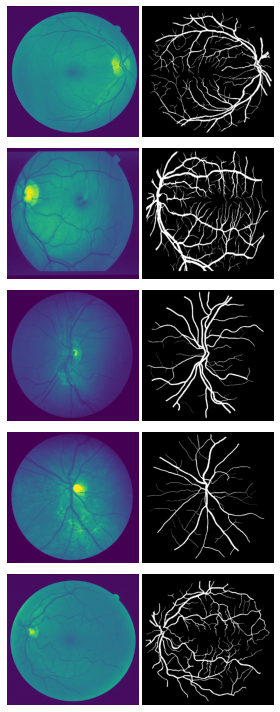

In [ ]:
fig, axs = plt.subplots(len(x_train[:5]),2, figsize=(4,10))

for i, (x, y) in enumerate(zip(x_train[:5], y_train[:5])):
    axs[i,0].imshow(x[...,0])
    axs[i,1].imshow(y[...,0], cmap='gray')
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()

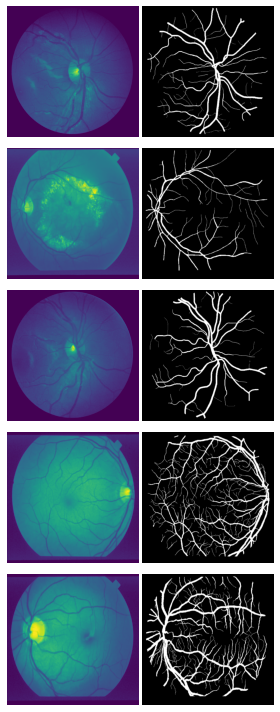

In [ ]:
fig, axs = plt.subplots(len(x_valid[:5]),2, figsize=(4,10))

for i, (x, y) in enumerate(zip(x_valid[:5], y_valid[:5])):
    axs[i,0].imshow(x[...,0])
    axs[i,1].imshow(y[...,0], cmap='gray')
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()

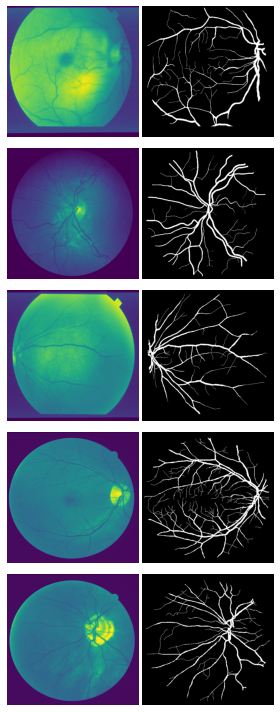

In [ ]:
fig, axs = plt.subplots(len(x_test[:5]),2, figsize=(4,10))

for i, (x, y) in enumerate(zip(x_test[:5], y_test[:5])):
    axs[i,0].imshow(x[...,0])
    axs[i,1].imshow(y[...,0], cmap='gray')
[axi.set_axis_off() for axi in axs.ravel()]
plt.tight_layout()
plt.show()